<a href="https://colab.research.google.com/github/Suriyakrishnansuriya/IMDB_Movie_Analysis/blob/main/IMDB_Movie_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: IMDB Movie Analysis With PowerBI**

In [ ]:
# import necessory libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive

## **Data Cleaning and Exploration**

In [ ]:
# Replace 'FILE_ID' with the actual file ID from the shareable link
file_id = '1bXz_ksbuLRFP9wDZBE53MyeQi2Ko54PI'

# Construct the download link
download_link = f'https://drive.google.com/uc?id={file_id}'

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(download_link)

# Display the DataFrame
print(df.head())


   color      director_name  num_critic_for_reviews  duration  \
0  Color      James Cameron                   723.0     178.0   
1  Color     Gore Verbinski                   302.0     169.0   
2  Color         Sam Mendes                   602.0     148.0   
3  Color  Christopher Nolan                   813.0     164.0   
4    NaN        Doug Walker                     NaN       NaN   

   director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
0                      0.0                   855.0  Joel David Moore   
1                    563.0                  1000.0     Orlando Bloom   
2                      0.0                   161.0      Rory Kinnear   
3                  22000.0                 23000.0    Christian Bale   
4                    131.0                     NaN        Rob Walker   

   actor_1_facebook_likes        gross                           genres  ...  \
0                  1000.0  760505847.0  Action|Adventure|Fantasy|Sci-Fi  ...   
1               

In [ ]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
# check whether null values in the data
df.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          20
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:

# check how many unique values is present in tha dataset
print('unique_values :',df['color'].unique())

print('number of unique_values :',df['color'].nunique())

unique_values : ['Color' nan ' Black and White']
number of unique_values : 2


In [ ]:
# check whether duplicates in the data
df.duplicated().sum()

45

In [ ]:
# row and columns
df.shape

(5043, 28)

In [ ]:
# how many years back the colored movies was started based on colored movies released over the years
color_df= df[df['color']=='Color']
print(color_df.sort_values(by='title_year', ascending= True))

      color     director_name  num_critic_for_reviews  duration  \
4449  Color  William Cottrell                   145.0      83.0   
3970  Color    Victor Fleming                   157.0     226.0   
1143  Color   Norman Ferguson                   105.0      88.0   
4225  Color       James Algar                    99.0     120.0   
4647  Color       James Algar                   116.0      70.0   
...     ...               ...                     ...       ...   
4798  Color               NaN                    75.0      60.0   
4803  Color               NaN                    11.0      22.0   
4819  Color               NaN                    23.0      43.0   
4869  Color               NaN                    11.0      58.0   
5039  Color               NaN                    43.0      43.0   

      director_facebook_likes  actor_3_facebook_likes      actor_2_name  \
4449                      0.0                    31.0     Billy Gilbert   
3970                    149.0                

In [ ]:
# how many years back the Black & white movies was started based on Black & white movies released over the years
black_df= df[df['color']==' Black and White']
print(black_df.sort_values(by='title_year', ascending= True))

                 color        director_name  num_critic_for_reviews  duration  \
4810   Black and White        D.W. Griffith                    69.0     123.0   
4958   Black and White    Harry F. Millarde                     1.0     110.0   
4885   Black and White           King Vidor                    48.0     151.0   
2734   Black and White           Fritz Lang                   260.0     145.0   
4664   Black and White  Georg Wilhelm Pabst                    71.0     110.0   
...                ...                  ...                     ...       ...   
5022   Black and White           Jim Chuchu                     6.0      60.0   
2858   Black and White         Alex Garland                   489.0     108.0   
479    Black and White                  NaN                    31.0      25.0   
1175   Black and White                  NaN                     4.0      30.0   
1818   Black and White                  NaN                    15.0      30.0   

      director_facebook_lik

In [ ]:
# Define a custom function to fill null values based on the "Years" column
def fill_color_based_on_years(row):
    if pd.notnull(row['color']):
        return row['color']
    elif pd.notnull(row['title_year']) and row['title_year'] < 1935:
        return ' Black and White'
    else:
        return 'Color'
# Apply the custom function to fill null values in "Color" column
df['color'] = df.apply(fill_color_based_on_years, axis=1)

In [ ]:
df['color'].isnull().sum()

0

In [ ]:
# drop null values in some columns

df.dropna(subset=['director_name','actor_3_name'], inplace=True)


In [ ]:
# Fill null values in each column with the mean of that column
df.fillna(df.mean(), inplace=True)

<ipython-input-106-dd6c2054c83d>:2: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.fillna(df.mean(), inplace=True)


In [ ]:
df.dropna(inplace=True)

## **Movie Genre Analysis: Analyze the distribution of movie genres and their impact on the IMDB score.**

### **Task: Determine the most common genres of movies in the dataset. Then, for each genre, calculate descriptive statistics (mean, median, mode, range, variance, standard deviation) of the IMDB scores.**

In [ ]:
# #splits the genres in the 'genres' column, counts the occurrences of each genre, and displays the most common genres.

# Determine the most common genres of movies
genres_counts = df['genres'].str.split('|', expand=True).stack().value_counts()
print("Most Common Genres:")
print(genres_counts)

Most Common Genres:
Drama          2343
Comedy         1739
Thriller       1314
Action         1087
Romance        1033
Adventure       879
Crime           825
Sci-Fi          578
Fantasy         573
Horror          518
Family          508
Mystery         454
Biography       278
Animation       226
Music           199
War             193
History         189
Sport           179
Musical         122
Western          86
Documentary      75
Film-Noir         5
News              1
dtype: int64


In [ ]:
# Analyze the IMDB scores for each genre
genre_statistics = {}

for genre in genres_counts.index:
    genre_movies = df[df['genres'].str.contains(genre, case=False, na=False)]
    imdb_scores = genre_movies['imdb_score']

# iterates over each unique genre, filters the DataFrame for movies belonging to that genre, and calculates the specified descriptive statistics for the IMDB scores.
 # Calculate descriptive statistics
    mean_score = imdb_scores.mean()
    median_score = imdb_scores.median()
    mode_score = imdb_scores.mode().iloc[0]
    range_score = imdb_scores.max() - imdb_scores.min()
    variance_score = imdb_scores.var()
    std_dev_score = imdb_scores.std()


    # Store results in a dictionary
    genre_statistics[genre] = {
        'Mean': mean_score,
        'Median': median_score,
        'Mode': mode_score,
        'Range': range_score,
        'Variance': variance_score,
        'Standard Deviation': std_dev_score
    }

In [ ]:
genre_statistics.items()

dict_items([('Drama', {'Mean': 6.762953478446436, 'Median': 6.8, 'Mode': 6.7, 'Range': 7.300000000000001, 'Variance': 0.8599164653839243, 'Standard Deviation': 0.927316809609275}), ('Comedy', {'Mean': 6.171362852213916, 'Median': 6.3, 'Mode': 6.7, 'Range': 7.1000000000000005, 'Variance': 1.1444843901267279, 'Standard Deviation': 1.0698057721505936}), ('Thriller', {'Mean': 6.327625570776256, 'Median': 6.4, 'Mode': 6.1, 'Range': 6.8, 'Variance': 1.0154205573349748, 'Standard Deviation': 1.0076807814655269}), ('Action', {'Mean': 6.227598896044158, 'Median': 6.3, 'Mode': 6.1, 'Range': 7.3, 'Variance': 1.1950755369416899, 'Standard Deviation': 1.0931951047007529}), ('Romance', {'Mean': 6.4586640851887696, 'Median': 6.5, 'Mode': 6.5, 'Range': 6.5, 'Variance': 0.9389582911216671, 'Standard Deviation': 0.9689986022289543}), ('Adventure', {'Mean': 6.430489192263936, 'Median': 6.6, 'Mode': 6.7, 'Range': 7.0, 'Variance': 1.2602994187327181, 'Standard Deviation': 1.1226305798136438}), ('Crime', {'

In [ ]:
# Display the results
print("\nGenre-wise IMDB Score Statistics:")
for genre, stats in genre_statistics.items():
    print(f"\nGenre: {genre}")
    for stat, value in stats.items():
        print(f"{stat}: {value}")


Genre-wise IMDB Score Statistics:

Genre: Drama
Mean: 6.762953478446436
Median: 6.8
Mode: 6.7
Range: 7.300000000000001
Variance: 0.8599164653839243
Standard Deviation: 0.927316809609275

Genre: Comedy
Mean: 6.171362852213916
Median: 6.3
Mode: 6.7
Range: 7.1000000000000005
Variance: 1.1444843901267279
Standard Deviation: 1.0698057721505936

Genre: Thriller
Mean: 6.327625570776256
Median: 6.4
Mode: 6.1
Range: 6.8
Variance: 1.0154205573349748
Standard Deviation: 1.0076807814655269

Genre: Action
Mean: 6.227598896044158
Median: 6.3
Mode: 6.1
Range: 7.3
Variance: 1.1950755369416899
Standard Deviation: 1.0931951047007529

Genre: Romance
Mean: 6.4586640851887696
Median: 6.5
Mode: 6.5
Range: 6.5
Variance: 0.9389582911216671
Standard Deviation: 0.9689986022289543

Genre: Adventure
Mean: 6.430489192263936
Median: 6.6
Mode: 6.7
Range: 7.0
Variance: 1.2602994187327181
Standard Deviation: 1.1226305798136438

Genre: Crime
Mean: 6.537454545454545
Median: 6.6
Mode: 6.6
Range: 6.9
Variance: 0.97919011

In [ ]:
# Calculate descriptive statistics for each genre
genre_stat = df.groupby('genres')['imdb_score'].describe()
print(genre_stat)

                                                    count      mean       std  \
genres                                                                          
Action                                                9.0  5.655556  1.490898   
Action|Adventure                                      9.0  6.877778  1.215296   
Action|Adventure|Animation|Comedy|Crime|Family|...    1.0  6.200000       NaN   
Action|Adventure|Animation|Comedy|Drama|Family|...    2.0  7.950000  0.070711   
Action|Adventure|Animation|Comedy|Family              6.0  6.500000  1.644384   
...                                                   ...       ...       ...   
Sci-Fi|Thriller                                      10.0  6.370000  1.256140   
Thriller                                             13.0  5.492308  1.154312   
Thriller|War                                          1.0  7.900000       NaN   
Thriller|Western                                      1.0  8.100000       NaN   
Western                     

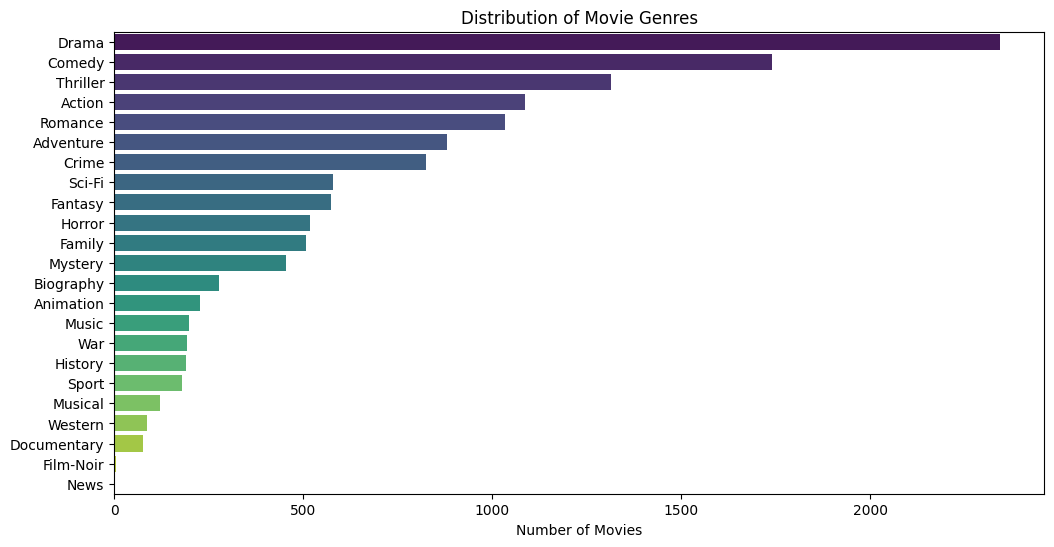

In [ ]:
# Display a bar chart of genre distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=genres_counts.values, y=genres_counts.index, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Number of Movies')
plt.show()

## **Movie Duration Analysis: Analyze the distribution of movie durations and its impact on the IMDB score..**

### **Task: Analyze the distribution of movie durations and identify the relationship between movie duration and IMDB score.**

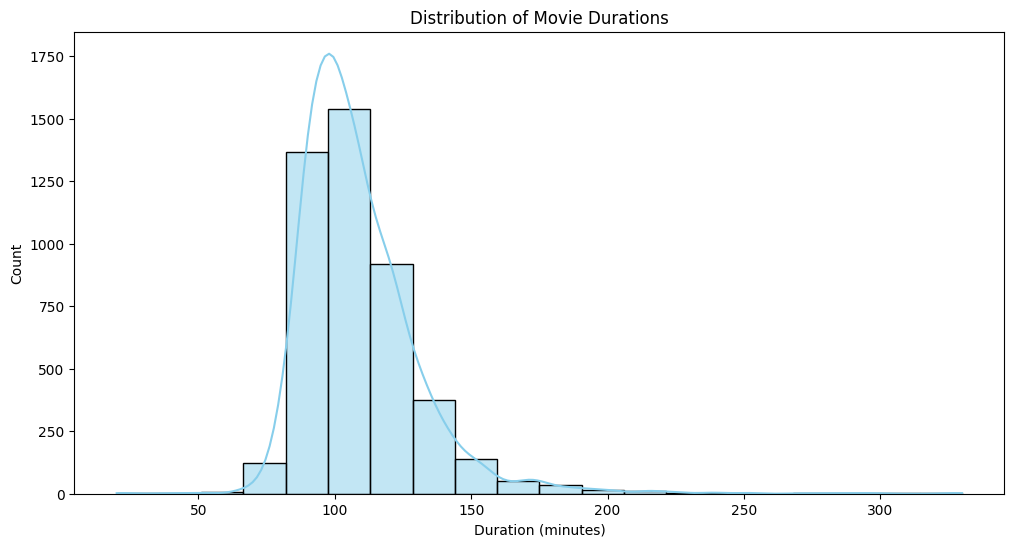

In [ ]:
# Analyze the distribution of movie durations
plt.figure(figsize=(12, 6))
sns.histplot(df['duration'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.show()

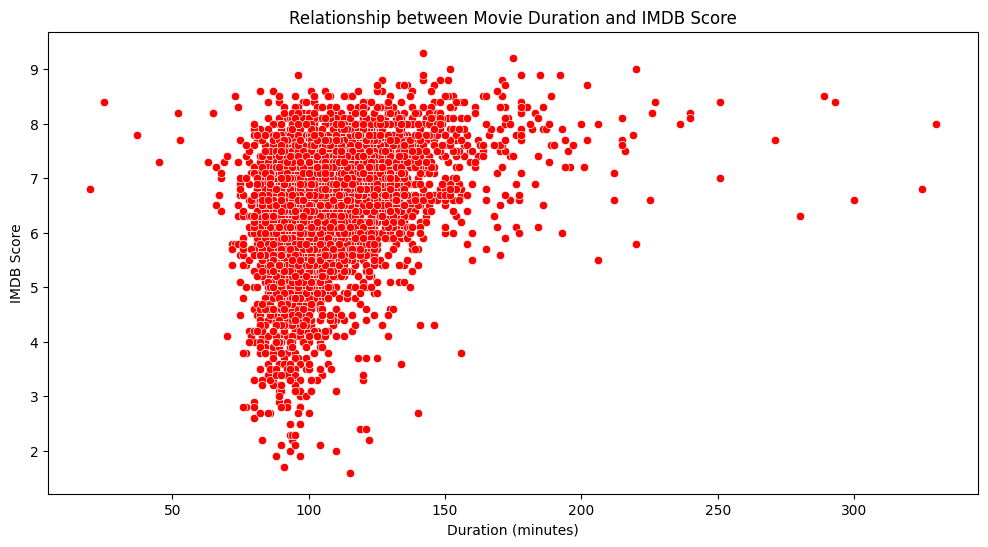

In [ ]:
# Identify the relationship between movie duration and IMDB score
plt.figure(figsize=(12, 6))
sns.scatterplot(x='duration', y='imdb_score', data=df, color='red')
plt.title('Relationship between Movie Duration and IMDB Score')
plt.xlabel('Duration (minutes)')
plt.ylabel('IMDB Score')
plt.show()

## **Language Analysis: Situation: Examine the distribution of movies based on their language.**

### **Task: Determine the most common languages used in movies and analyze their impact on the IMDB score using descriptive statistics.**

In [ ]:
# Determine the most common languages in movies
language_counts = df['language'].str.split(', ', expand=True).stack().value_counts()

# Display the most common languages
print("Most Common Languages:")
print(languages_counts)

Most Common Languages:
English       4357
French          50
Spanish         33
Mandarin        22
Hindi           14
German          14
Japanese        13
Cantonese        8
Portuguese       8
Italian          8
Korean           7
Russian          7
Danish           5
Norwegian        4
Hebrew           4
Persian          4
Thai             3
Dutch            3
Aboriginal       2
None             2
Indonesian       2
Dari             2
Swedish          2
Zulu             2
Arabic           1
Romanian         1
Polish           1
Vietnamese       1
Mongolian        1
Czech            1
Hungarian        1
Bosnian          1
Aramaic          1
Kazakh           1
Maya             1
Filipino         1
Greek            1
Name: language, dtype: int64


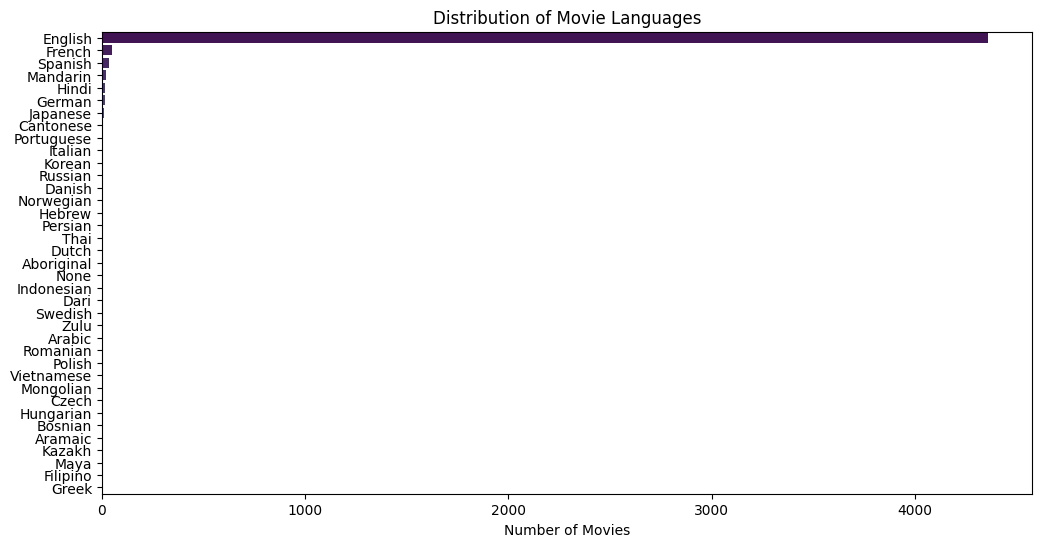

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=language_counts.values, y=language_counts.index, palette='viridis')
plt.title('Distribution of Movie Languages')
plt.xlabel('Number of Movies')
plt.show()

## **Director Analysis: Influence of directors on movie ratings.**

### **Task: Identify the top directors based on their average IMDB score and analyze their contribution to the success of movies using percentile calculations.**

In [ ]:
# Identify top directors based on average IMDB score
top_directors = df.groupby('director_name')['imdb_score'].mean().sort_values(ascending=False).head(10)
print(f'Top Directors :', top_directors)

Top Directors : director_name
Sadyk Sher-Niyaz     8.700
Akira Kurosawa       8.700
Charles Chaplin      8.600
Ron Fricke           8.500
Majid Majidi         8.500
Damien Chazelle      8.500
Sergio Leone         8.475
Tony Kaye            8.450
Christopher Nolan    8.425
Jay Oliva            8.400
Name: imdb_score, dtype: float64


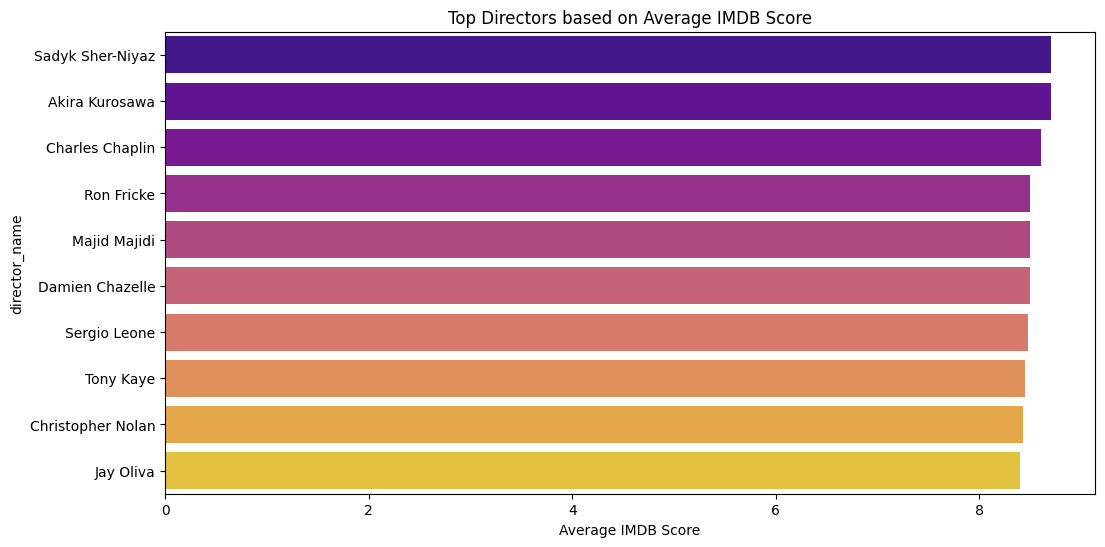

In [ ]:
# Display a bar chart of top directors
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='plasma')
plt.title('Top Directors based on Average IMDB Score')
plt.xlabel('Average IMDB Score')
plt.show()

In [ ]:
# Analyze the contribution of directors using percentile calculations
director_percentiles = df.groupby('director_name')['imdb_score'].describe(percentiles=[.25, .5, .75])
print(director_percentiles)

                    count  mean       std  min   25%  50%   75%  max
director_name                                                       
A. Raven Cruz         1.0   1.9       NaN  1.9  1.90  1.9  1.90  1.9
Aaron Hann            1.0   6.0       NaN  6.0  6.00  6.0  6.00  6.0
Aaron Schneider       1.0   7.1       NaN  7.1  7.10  7.1  7.10  7.1
Aaron Seltzer         1.0   2.7       NaN  2.7  2.70  2.7  2.70  2.7
Abel Ferrara          1.0   6.6       NaN  6.6  6.60  6.6  6.60  6.6
...                   ...   ...       ...  ...   ...  ...   ...  ...
Zak Penn              1.0   6.6       NaN  6.6  6.60  6.6  6.60  6.6
Zal Batmanglij        2.0   6.8  0.141421  6.7  6.75  6.8  6.85  6.9
Álex de la Iglesia    1.0   6.1       NaN  6.1  6.10  6.1  6.10  6.1
Émile Gaudreault      1.0   6.7       NaN  6.7  6.70  6.7  6.70  6.7
Étienne Faure         1.0   4.3       NaN  4.3  4.30  4.3  4.30  4.3

[2117 rows x 8 columns]


## **Budget Analysis: Explore the relationship between movie budgets and their financial success.**

### **Task: Analyze the correlation between movie budgets and gross earnings, and identify the movies with the highest profit margin.**

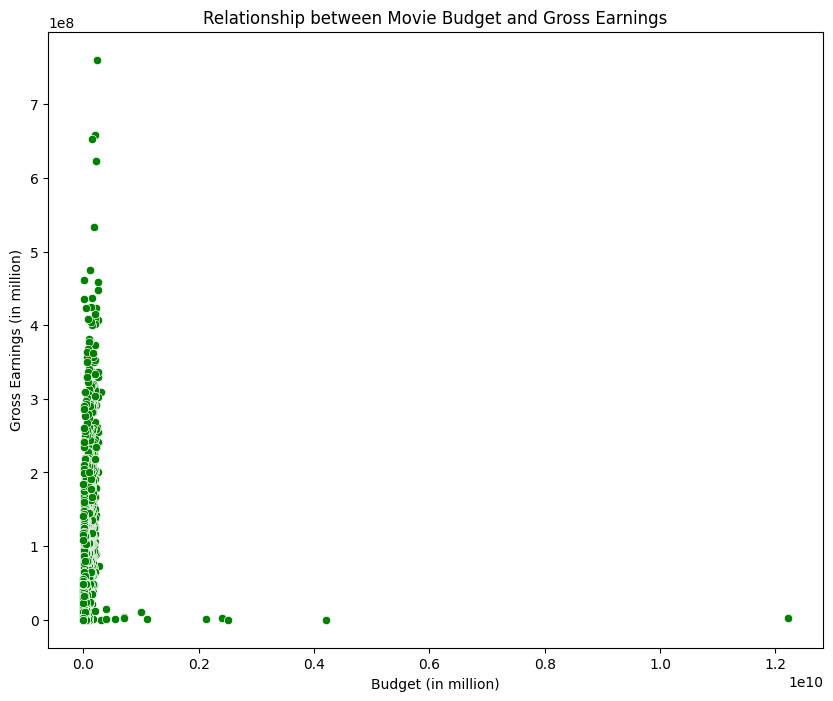

In [ ]:
# Analyze the correlation between movie budgets and gross earnings
plt.figure(figsize=(10, 8))
sns.scatterplot(x='budget', y='gross', data=df, color='green')
plt.title('Relationship between Movie Budget and Gross Earnings')
plt.xlabel('Budget (in million)')
plt.ylabel('Gross Earnings (in million)')
plt.show()

In [ ]:
# Identify movies with the highest profit margin
df['Profit_Margin'] = (df['gross'] - df['budget']) /df['budget'] * 100
top_profit_movies = df.nlargest(10, 'Profit_Margin')[['movie_title', 'Profit_Margin']]
print(top_profit_movies)

                             movie_title  Profit_Margin
5036                    The Mongol King    1.496056e+06
4793                Paranormal Activity    7.193486e+05
4799                          Tarnation    2.714661e+05
4957                         Eraserhead    2.430254e+05
5024           All Superheroes Must Die    2.430254e+05
4707            The Blair Witch Project    2.341169e+05
5000                     Raymond Did It    1.214627e+05
4995              This Is Martin Bonner    1.156740e+05
5006  Her Cry: La Llorona Investigation    8.094180e+04
4980        The Brain That Wouldn't Die    7.832755e+04


In [ ]:
top_profit_movies.to_excel('top_profit_Movie_Analysis.xlsx', index=True)